# 📞 Eficacia Operativa: Servicio de Telefonía Virtual CallMeMaybe

---
Enlaces Entregables

---
#### 🔗 Google Drive 📂
*Enlace directo a la carpeta:* 
https://drive.google.com/drive/folders/1vbRrGZHt6WKWrc_Y1ii4uYfKO9xac-wC?usp=sharing


- Contiene:
##### 📄 Informe en PDF
##### 📝 Archivo TXT (Readme y enlace al dashboard de Tableau)
##### 🐍 Jupyter Notebook (.ipynb)
##### 🗃️ Dataset originales y finales

---

#### 📊 Tableau Public 👀
*Enlace directo al dashboard interactivo:*
https://public.tableau.com/views/proyecto_final_telecom/DashboardTelecomcontrolsobreoperadoresineficaces?:language=es-ES&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

#### **Identificar los operadores ineficaces evaluando su desempeño mediante 3 variables:**

**1. Llamadas perdidas o sin contestar**

**2. El tiempo que tardan en contestar las llamadas entrantes ( internas y externas)**

**3. Cantidad de llamadas salientes por parte de los operadores**

Pero ¿qué es ineficaz? o ¿cuáles son los parámetros operacionales e instrumentales para definir cuándo es eficaz un operador?

Hay aspectos que podrían sesgar el análisis como la distribución de:
- La cantidad de llamadas entrantes y su aleatoriedad.
- La estacionalidad o picos de alta demanda.
- Las jornadas laborales y horarios.
- Las sobrecargas laborales y horas extras.
- La atención de llamadas complejas que ameritan más tiempo.
- Sistema de desvío automático de llamadas interno y externo.

---
## 📋 Índice Analítico

### 1. 🎯 Problema de Negocio y Objetivos
- Identificación del problema
- Justificación del proyecto
- Objetivos del análisis

### 2. 📊 Descripción y Calidad de los Datos
    2.1. Origen de los Datos
    2.2. Breve Resumen Estadístico de las Variables
    2.3. Análisis de la Calidad de los Datos
        2.3.1 Descripción de los datasets

### 3. 🔍 Análisis Exploratorio de Datos (EDA)
    3.1. Creación de Variables Clave
    3.2. Visualización de la Distribución de las Llamadas
    3.3. Análisis de Operadores Ineficaces

### 4. 📈 KPIs: Definición y Cálculo
    4.1. Duración Promedio de la Llamada (ACD - Average Call Duration)
    4.2. Tasa de Llamadas Perdidas
    4.3. Tiempo de Espera Promedio (AWT)
    4.4. Cantidad de Llamadas Salientes por Operador

### 5. 🧪 Formulación y Prueba de Hipótesis
    5.1. Hipótesis Clave
    5.2. Metodología de la Prueba
    5.3. Resultados y Conclusiones de las Pruebas

### 6. ⚙️ Acciones a Ejecutar (Procesamiento y Análisis)
    6.1. Acciones de Procesamiento y Limpieza de Datos
    6.2. Acciones de Análisis

### 7. 👥 Identificación de Stakeholders

### 8. 📝 Conclusiones y Presentación
    8.1. Resumen de Hallazgos
    8.2. Presentación y Enlaces a Fuentes
---

## 1. Problema de Negocio y Objetivos 🎯

**"Challenge/definición" ❓**
##### ¿Cómo evaluar el desempeño de los operadores?

**Importancia de resolverlo: ✅**
    Conocer la eficacia de los operadores para maximizar los recursos de la empresa mediante la optimización del desempeño, con el fin de brindar un servicio al cliente que supere sus expectativas.
    - Evaluación, medición y control del desempeño: Saber qué tan bien lo están haciendo los operadores.
    - Mejora continua: Estándares mínimos de eficacia y capacitación en estos parámetros.
    - Análisis de recursos: Ante altos picos de demanda (contratar más personal o líneas)
    - ACD (Average Call Duration): Medir por llamadas perdidas, tiempo de espera y tiempo promedio qde resolución de consulta. 

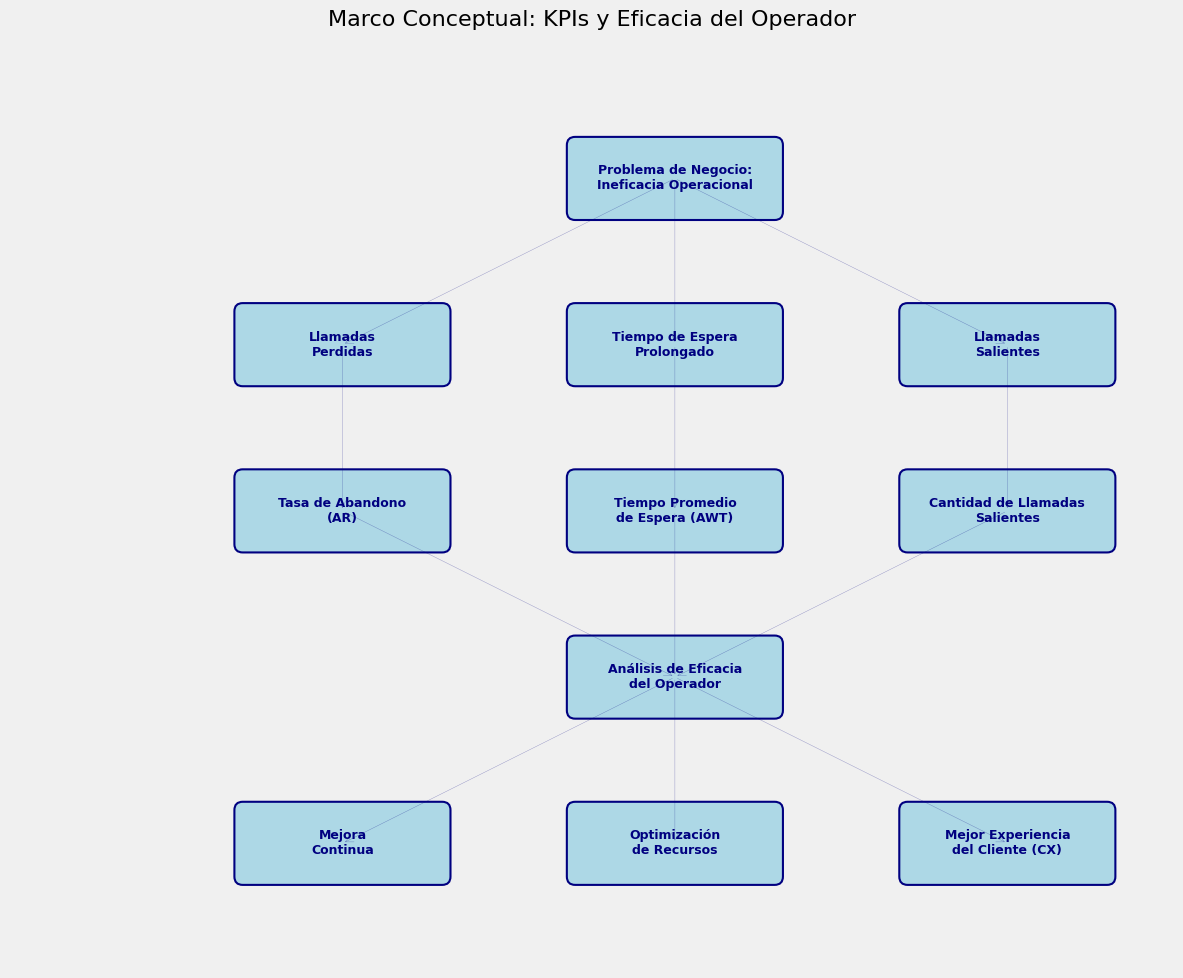

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import numpy as np

# Crear figura
fig, ax = plt.subplots(figsize=(14, 10))

# Definir posiciones y textos para los nodos
nodes = {
    # Nivel 1: Problema principal
    "Problema de Negocio:\nIneficacia Operacional": (7, 9),

    # Nivel 2: Variables clave
    "Llamadas\nPerdidas": (3, 7),
    "Tiempo de Espera\nProlongado": (7, 7),
    "Llamadas\nSalientes": (11, 7),

    # Nivel 3: KPIs
    "Tasa de Abandono\n(AR)": (3, 5),
    "Tiempo Promedio\nde Espera (AWT)": (7, 5),
    "Cantidad de Llamadas\nSalientes": (11, 5),

    # Nivel 4: Resultados
    "Análisis de Eficacia\ndel Operador": (7, 3),

    # Nivel 5: Beneficios
    "Mejora\nContinua": (3, 1),
    "Optimización\nde Recursos": (7, 1),
    "Mejor Experiencia\ndel Cliente (CX)": (11, 1)
}

# Dibujar nodos
for text, (x, y) in nodes.items():
    # Crear caja con bordes redondeados
    box = FancyBboxPatch((x-1.2, y-0.4), 2.4, 0.8,
                        boxstyle="round,pad=0.1",
                        facecolor='lightblue',
                        edgecolor='navy',
                        linewidth=1.5)
    ax.add_patch(box)

    # Añadir texto
    ax.text(x, y, text, ha='center', va='center', 
            fontsize=9, fontweight='bold', color='navy')

# Definir conexiones (desde, hasta)
connections = [
    ("Problema de Negocio:\nIneficacia Operacional", "Llamadas\nPerdidas"),
    ("Problema de Negocio:\nIneficacia Operacional", "Tiempo de Espera\nProlongado"),
    ("Problema de Negocio:\nIneficacia Operacional", "Llamadas\nSalientes"),

    ("Llamadas\nPerdidas", "Tasa de Abandono\n(AR)"),
    ("Tiempo de Espera\nProlongado", "Tiempo Promedio\nde Espera (AWT)"),
    ("Llamadas\nSalientes", "Cantidad de Llamadas\nSalientes"),

    ("Tasa de Abandono\n(AR)", "Análisis de Eficacia\ndel Operador"),
    ("Tiempo Promedio\nde Espera (AWT)", "Análisis de Eficacia\ndel Operador"),
    ("Cantidad de Llamadas\nSalientes", "Análisis de Eficacia\ndel Operador"),

    ("Análisis de Eficacia\ndel Operador", "Mejora\nContinua"),
    ("Análisis de Eficacia\ndel Operador", "Optimización\nde Recursos"),
    ("Análisis de Eficacia\ndel Operador", "Mejor Experiencia\ndel Cliente (CX)")
]

# Dibujar conexiones (flechas)
for start_text, end_text in connections:
    start_pos = nodes[start_text]
    end_pos = nodes[end_text]
    
    # Dibujar flecha
    ax.annotate('', xy=end_pos, xytext=start_pos,
                arrowprops=dict(arrowstyle='->', color='navy', lw=0.3, alpha=0.4))

# Configurar el gráfico
ax.set_xlim(-1, 13)
ax.set_ylim(-0.5, 10.5)
ax.set_aspect('equal')
ax.axis('off')
plt.title('Marco Conceptual: KPIs y Eficacia del Operador', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## 2. Descripción de los datos 📊

### **2.1 Origen de los datos 📁**

**Proporcionados por la empresa "Telefonía Virtual CallMeMaybe":**
- telecom_dataset_us.csv: métricas operacionales detalladas de llamadas (dirección (entrante/saliente), duración, si fue llamada perdida y el identificador del operador.
- telecom_clients_us.csv: información de los clientes (plan tarifario y fecha de registro, utilizando user_id como identificador único)
- Los archivos se utilizarán para crear una vista unificada que conecte métricas de llamadas con características del cliente.
---
**Modelo de negocio CallMeMaybe**
- Los datasets indican sobre el uso del servicio de telefonía virtual CallMeMaybe.
- Los clientes son organizaciones que necesitan:
    - Distribuir gran cantidad de llamadas entrantes entre varios operadores
    - Realizar llamadas salientes mediante sus operadores.
- Los operadores también pueden realizar llamadas internas para comunicarse entre ellos (mediante red CallMeMaybe)
---
**Variables determinantes**
- **call_duration y total_call_duration**: para calcular métricas clave como wait_time (crítico para evaluar CX)
- **is_missed_call**: para calcular Tasa de Llamadas Perdidas (KPI directo de la frustración del cliente)
---

### **2.2 Breve resumen estadístico de las variables 🔢**
- Dos tipos de variables:
    - **Numéricas**: calls_count, call_duration, total_call_duration y la nueva variable: wait_time.
    - **Categóricas**: direction, internal, is_missed_call, tariff_plan


**Naturaleza de los datos:**
- Carga (telecom_dataset_us.csv y telecom_clients_us.csv) en un DF Pandas
    - Análisis:
        - Variables Numéricas (calls_count, call_duration, total_call_duration):
            - Medidas de tendencia central: Media y mediana.
            - Medidas de dispersión: Desviación estándar.
            - Medidas de posición: Cuartiles (Q1, Q2, Q3) para identificar la distribución y posibles valores atípicos.<br><br>
        - Tipo de datos:
            - Rename o lower/strip/replace(" ", "_",)
            - Date_time, Int, Float, Binario(0,1 y 2/ en caso de aplicar ML)<br><br>
        - Variables Categóricas (direction, internal, tariff_plan):
            - Tablas de frecuencia: Cantidad de veces que aparece cada categoría.
            - Porcentajes: Porcentaje de cada categoría para ver su participación en el total.
                - Método value_counts() en las columnas correspondientes.
                - Cantidad de valores únicos en cada columna. 

### **2.3 Calidad de los datos 🧹**
- Valores perdidos:
    - Propósito: información faltante que pueda sesgar el análisis.
    - Acción: funciones Pandas para contar valores nulos o faltantes en las columna del los DF´s.<br><br>
- Registros duplicados:
    - Propósito: Evitar repetidos que alteren estadísticas y KPIs.
    - Acción: Pandas para identificar y contar filas duplicadas.
---
- **Nota:** Se eliminan o imputan a juicio experto del analista 

#### 2.3.1 Una mirada al contenido:

#### telecom_dataset_us.csv

| Columna | Descripción |
|---------|-------------|
| `user_id` | ID de la cuenta de cliente |
| `date` | Fecha en la que se recuperaron las estadísticas |
| `direction` | Dirección de llamada (`out` para saliente, `in` para entrante) |
| `internal` | Si la llamada fue interna (entre los operadores de un cliente) |
| `operator_id` | Identificador del operador |
| `is_missed_call` | Si fue una llamada perdida |
| `calls_count` | Número de llamadas |
| `call_duration` | Duración de la llamada (sin incluir el tiempo de espera) |
| `total_call_duration` | Duración de la llamada (incluido el tiempo de espera) |

#### telecom_clients_us.csv

| Columna | Descripción |
|---------|-------------|
| `user_id` | ID de usuario |
| `tariff_plan` | Tarifa actual de la clientela |
| `date_start` | Fecha de registro de la clientela |

#### 2.3.2  Gestionando Variables, Ceros y Atípicos

#### a. Exclusión de variables poco relevantes para evaluar ineficacia del operador:
- date_start (del archivo telecom_clients_us.csv): fecha de registro del cliente no tiene impacto directo en eficacia del operador.
- user_id: Se usará para unir los datasets y no en análisis estadístico (nos enfocamos en desempeño operador (operator_id))

#### b. Manejo de Ceros y Valores Atípicos:
- Ceros: En call_duration 0 significa llamada no atendida, no se elimina (para calcular Tasa Llamadas Perdidas (Missed Call Rate).
- Valores Atípicos: En call_duration, total_call_duration y wait_time se buscan atípicos mediante Rango Intercuartílico (IQR).
    - Si son pocos, se analiza individual (¿errores de registro o datos extremos válidos?). 
    - Si son muchos, se eliminan o transforman si es necesario (logaritmo).

### **2.4 Limpieza y Preparación de Datos 🧹**

##### **Fase 1. Encabezado y Metadatos 📁**

##### Título del Proyecto: Eficacia Operacional: Servicio de Telefonía Virtual CallMeMaybe
##### Nombre del Analista: Marcel Andrés Palma Céspedes
##### Fecha: 18/08/2025

##### **Fase 2: Importando librerías (incluye display para mejor visibilidad)**

In [29]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Otras configuraciones...
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

##### **Fase 3: Procesando y limpiando datos 🧹**

In [30]:
# Carga datasets 📁
df_telecom = pd.read_csv("/datasets/telecom_clients_us.csv")
df_clients = pd.read_csv("/datasets/telecom_dataset_us.csv")

In [31]:
#Vista previa antes de unir los DataFrames

# DF telecom: Resumen de información
info_df_telecom = pd.DataFrame({
    'Data Type': df_telecom.dtypes,
    'Non-Null Count': df_telecom.count(),
    'Null Count': df_telecom.isnull().sum(),
})

display(info_df_telecom)

,Data Type,Non-Null Count,Null Count
user_id,int64,732,0
tariff_plan,object,732,0
date_start,object,732,0


In [32]:
# DF Clients: Resumen de información
info_df_clients = pd.DataFrame({
    'Data Type': df_clients.dtypes,
    'Non-Null Count': df_clients.count(),
    'Null Count': df_clients.isnull().sum(),
})

display(info_df_clients)

,Data Type,Non-Null Count,Null Count
user_id,int64,53902,0
date,object,53902,0
direction,object,53902,0
internal,object,53785,117
operator_id,float64,45730,8172
is_missed_call,bool,53902,0
calls_count,int64,53902,0
call_duration,int64,53902,0
total_call_duration,int64,53902,0


##### **Fase 4: Uniendo DF´s 🤝**

In [33]:
# 2. Unión DF´s 🤝
# Se unen con "user_id".
df = pd.merge(df_telecom, df_clients, on='user_id', how='left')
display(df.head())
display(df.shape)

,user_id,tariff_plan,date_start,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166713,A,2019-08-15,2019-08-21 00:00:00+03:00,in,False,NaN,True,4.0,0.0,8.0
1,166713,A,2019-08-15,2019-08-22 00:00:00+03:00,in,False,891918.0,False,1.0,40.0,62.0
2,166713,A,2019-08-15,2019-08-22 00:00:00+03:00,in,False,891908.0,False,4.0,538.0,568.0
3,166713,A,2019-08-15,2019-08-22 00:00:00+03:00,in,False,NaN,True,4.0,0.0,8.0
4,166713,A,2019-08-15,2019-08-26 00:00:00+03:00,in,False,891908.0,False,1.0,713.0,727.0


(54327, 11)

##### Un vistazo sobre la unión 🤝
- telecom_dataset_us.csv: 732 filas
- telecom_clients_us.csv: 53,902 filas
- Con "merge", argumento how='left', se mantienen todas las filas (732).
    - Para coincidir "user_id" en el DF de clientes para cada las 732 filas.
    - Si un "user_id" de no está presente en DF Clientes, entonces columnas tariff_plan y date_start se llenan con NaN.
    - Si el user_id se encuentra, "tariff_plan" y "date_start" se unen.
    - De ahí la diferencia en conteos de "Non-Null Count".

#### **Fase 5: Limpieza de datos y creación de variables clave 🛠️**

##### **Tiempo de espera (wait_time)**
- Tiempo de espera prolongado es signo de ineficacia.
    - Nueva columna: "call_duration" - "total_call_duration" (KPI para la satisfacción del cliente)
- Duración Promedio de la Llamada (ACD):
    - Promedio de columna call_duration por operador (métrica de eficiencia en la interacción)
    - ACD muy bajo significaría que los agentes apresuran interacciones (compromete calidad del servicio a largo plazo).

In [34]:
# Conversión tipos de datos - fechas a formato datetime
df['date'] = pd.to_datetime(df['date'], utc=True)
df['date_start'] = pd.to_datetime(df['date_start'])

# Eliminación de duplicados
num_duplicates = df.duplicated().sum()
if num_duplicates > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print(f"\nSe eliminaron {num_duplicates} filas duplicadas.")
else:
    print("\nNo se encontraron filas duplicadas.")

# Creación variable clave "wait_time"
df['wait_time'] = df['total_call_duration'] - df['call_duration']

# Identificación y manejo de ceros (ceros en "call_duration" no se eliminan / representan llamadas perdidas
print("\nConteo de ceros en 'call_duration':", (df['call_duration'] == 0).sum())

# Exclusión de variables irrelevantes ("date_start" y "user_id" no son necesarios / se mantiene para futuras consultas)
df_final = df.drop(columns=['date_start'])

print("\n Resumen del DF")
display(df_final)


Se eliminaron 4900 filas duplicadas.

Conteo de ceros en 'call_duration': 21174

 Resumen del DF


,user_id,tariff_plan,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time
0,166713,A,2019-08-20 21:00:00+00:00,in,False,NaN,True,4.0,0.0,8.0,8.0
1,166713,A,2019-08-21 21:00:00+00:00,in,False,891918.0,False,1.0,40.0,62.0,22.0
2,166713,A,2019-08-21 21:00:00+00:00,in,False,891908.0,False,4.0,538.0,568.0,30.0
3,166713,A,2019-08-21 21:00:00+00:00,in,False,NaN,True,4.0,0.0,8.0,8.0
4,166713,A,2019-08-25 21:00:00+00:00,in,False,891908.0,False,1.0,713.0,727.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...
49422,167012,B,2019-08-29 21:00:00+00:00,in,False,NaN,True,2.0,0.0,11.0,11.0
49423,167012,B,2019-08-29 21:00:00+00:00,out,True,899076.0,True,1.0,0.0,22.0,22.0
49424,167012,B,2019-08-29 21:00:00+00:00,out,False,898434.0,True,1.0,0.0,21.0,21.0
49425,166867,B,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Estadística de la nueva variable "wait_time"
display(df_final["wait_time"].describe())

count    49002.000000
mean       290.276111
std       1132.155291
min          0.000000
25%         17.000000
50%         55.000000
75%        200.000000
max      46474.000000
Name: wait_time, dtype: float64

**Observación sobre "wait_time"**
- La mayoría de clientes esperan aprox. 55 segundos (tiempo de espera razonable). 
- Un pequeño % atípico espera tiempos muy largos (elevando el promedio general a 290 segundos)

**Coclusión clave:** Aunque el servicio es bueno para la mayoría hay un fallo en las llamadas más largas (frustración a una minoría de clientes).


## 3. Análisis Exploratorio de Datos (EDA) 🕵️

##### 3.1.1 Tiempo de espera (wait_time)  📁
- Ya se creó columna wait_time (tiempo de espera del cliente antes de ser atendido) 
- Ya se han limpiado los datos para mayor precisión en métricas de rendimiento.

### 3.2 Visualizando distribución de llamadas 📈

#### - Distribución de la duración de las llamadas ¿son cortas o existe un grupo de muy largas?

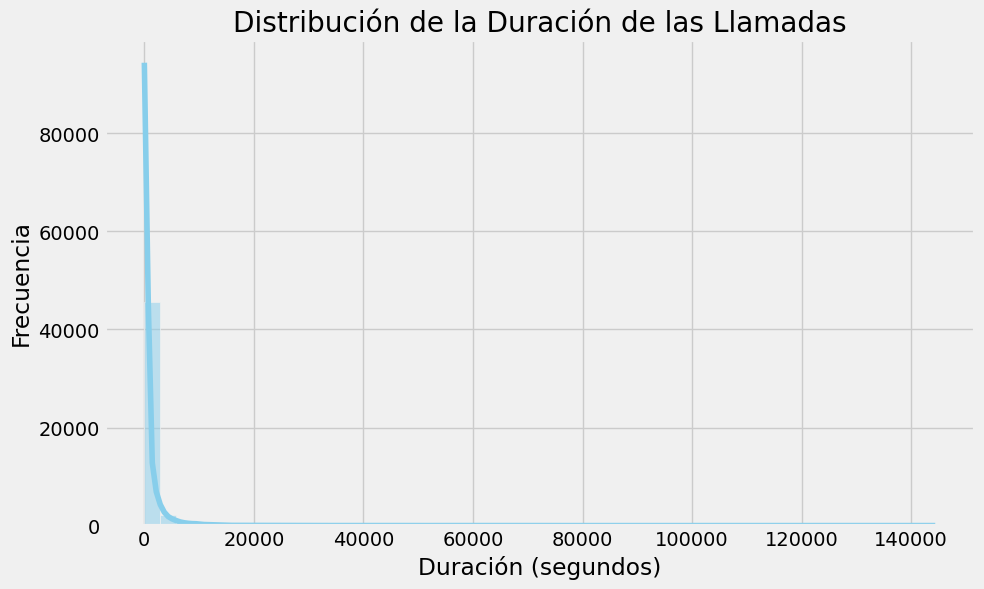

In [36]:
# Gráfico
plt.style.use('fivethirtyeight')

# Histograma duración de llamada (call_duration)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='call_duration', bins=50, kde=True, color='skyblue')
plt.title('Distribución de la Duración de las Llamadas')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.show()

**Notas call_duration:**
- Distribución muy sesgada hacia la derecha
- Mayoría de llamadas muy cortas (aprox. menos de 500 segundos)
- Cola larga a la derecha (pequeña cantidad de llamadas tienen una duración muy larga)
- Línea curva sobre barras muestra distribución sesgada (anormal).
- Duración promedio llamada (ACD) no es la mejor métrica por sí sola para evaluar desempeño del operador.

#### - Distribución de la duración en tiempo de espera

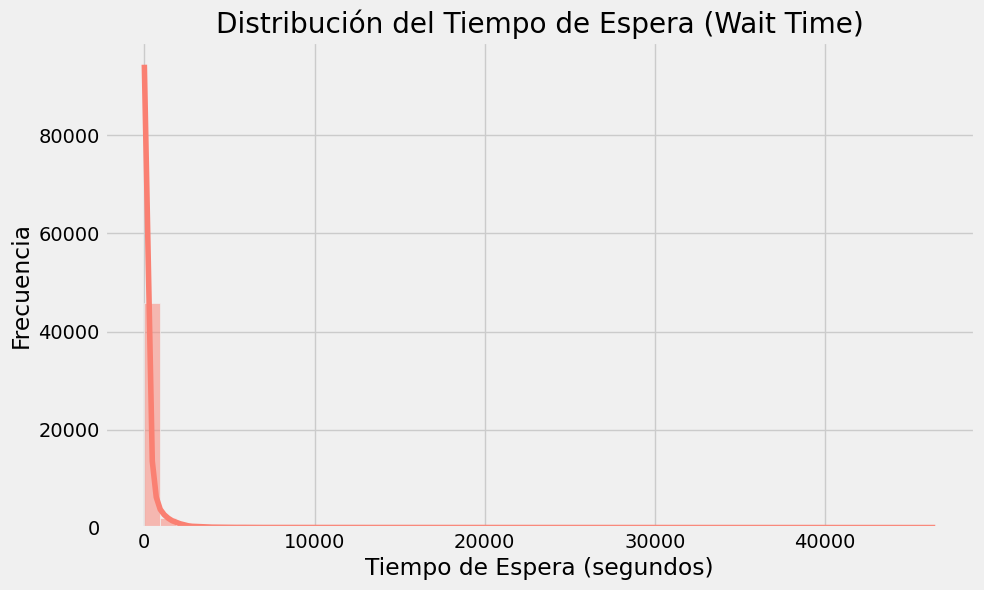

In [37]:
# Histograma tiempo de espera (wait_time)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='wait_time', bins=50, kde=True, color='salmon')
plt.title('Distribución del Tiempo de Espera (Wait Time)')
plt.xlabel('Tiempo de Espera (segundos)')
plt.ylabel('Frecuencia')
plt.show()

**Notas Wait_Time**
- Distribución Asimétrica: distribución muy sesgada a la derecha y mayoría de clientes no espera mucho tiempo (0 a 250 segundos)
- "Cola Larga" se extiende a la derecha con atípicos que superan 500 y 1000 segundos (casos de espera muy largos).

##### **Conclusión clave:** Aunque el servicio es eficaz para la mayoría hay un fallo en gestión de llamadas (tiempos de espera prolongados por operadores ineficaces).

#### - Llamadas internas "operadores" vs. externas "clientes" (internal=False)

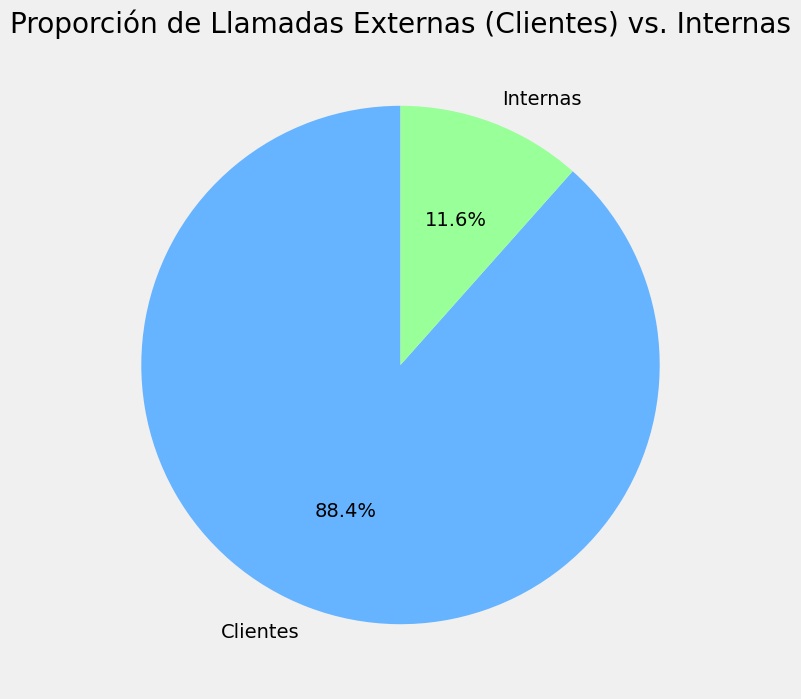

In [38]:
# Proporción entre llamadas internas y externas
call_proportions = df_final['internal'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(call_proportions, labels=['Clientes', 'Internas'], autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('Proporción de Llamadas Externas (Clientes) vs. Internas')
plt.show()

**Notas:** 88.4 % de llamadas son externas y 11.6 % internas (operadores más dedicados a la atención del cliente).

#### - Detección de valores atípicos en wait_time

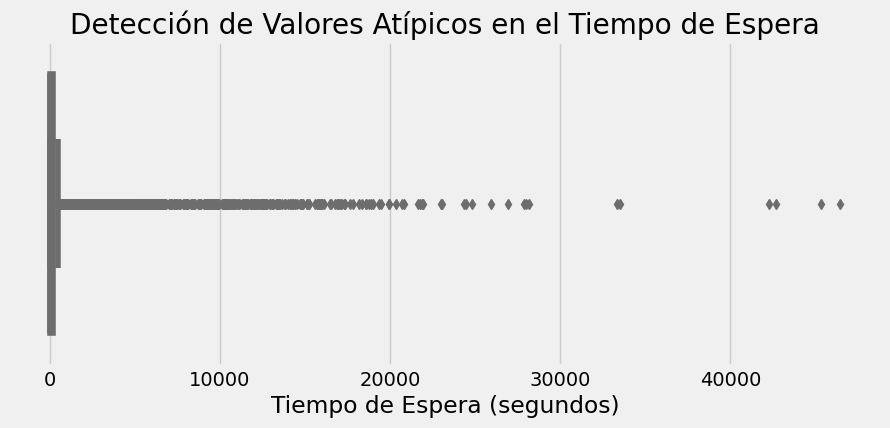

In [39]:
# Diagrama de caja (boxplot) para wait_time
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_final, x='wait_time', color='salmon')
plt.title('Detección de Valores Atípicos en el Tiempo de Espera')
plt.xlabel('Tiempo de Espera (segundos)')
plt.show()

**Sesgo a tiempos de espera muy largos (frustración del cliente)**
- Caja se aplasta a la izquierda porque la escala del eje X se extiende hasta casi 50 mil (atípicos extremos elevan promedio).
- Confirma estadística: "count 49002-total", "mean 290-promedio", "min 0-mínimo o perdidas, "50% - 55 Mediana y "max 46474 - máximo"

#### - Zoom del boxplot para ver intercuartílico

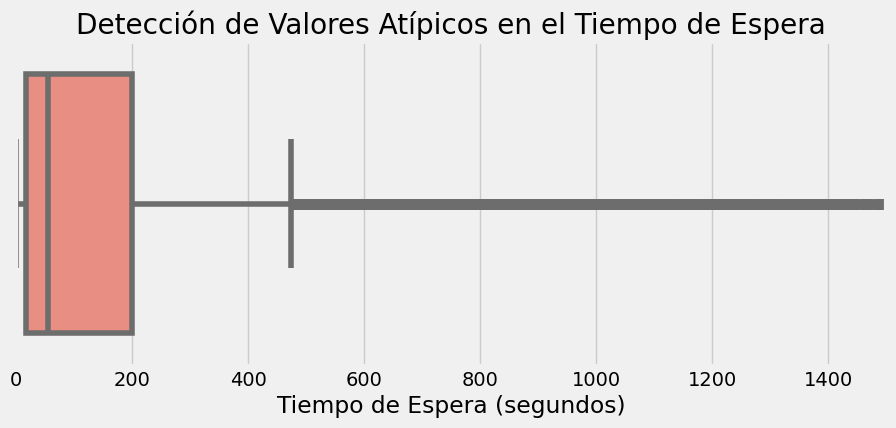

In [40]:
# Código zoom del boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_final, x='wait_time', color='salmon')
plt.title('Detección de Valores Atípicos en el Tiempo de Espera')
plt.xlabel('Tiempo de Espera (segundos)')

# Límites al eje X (como 1500 segundos para mayor visibilidad del rango intercuartílico
plt.xlim(0, 1500)

plt.show()

**Notas:** Mayoría de tiempos de espera son cortos y el problema está en atípicos fuera de la caja o rango.

#### - Sobre cuartiles de wait_time

In [41]:
# Calcular los cuartiles
q1 = df_final['wait_time'].quantile(0.25)
median = df_final['wait_time'].quantile(0.50)
q3 = df_final['wait_time'].quantile(0.75)
iqr = q3 - q1

# Imprimir los resultados
print(f"Primer Cuartil (Q1): {q1:.2f} segundos")
print(f"Mediana (Q2): {median:.2f} segundos")
print(f"Tercer Cuartil (Q3): {q3:.2f} segundos")
print(f"Rango Intercuartil (IQR): {iqr:.2f} segundos")

Primer Cuartil (Q1): 17.00 segundos
Mediana (Q2): 55.00 segundos
Tercer Cuartil (Q3): 200.00 segundos
Rango Intercuartil (IQR): 183.00 segundos


**Notas:**
- Mediana (Q2:55 s): Valor central-50%, llamadas con tiempo de espera =< a 55 s (Eficiente para la mayoría)
- Rango intercuartil (IQR:183 s): Diferencia entre 75% y 25%, grande en comparación con la mediana (183 vs 55)
    - Gran dispersión por encima de la mediana y tiempos de espera "50% superior" mucho más altos "50% inferior".
- Diferencia Q3 vs. Mediana: Diferencia entre Q3(200) y mediana(Q2:55) de 145 segundos.
    - Diferencia entre mediana y Q1(17) es solo 38 segundos (asimetría confirma valores dispersos y elevan "media" a 290 s).

### 3.3 Analizando operadores ineficaces 🧐
- Distribución de operadores: Carga desproporcionada ¿Llamadas se distribuyen equitativamente entre operadores?
- Análisis de métricas por operador: Agrupar por "operator_id" para contar # de llamadas perdidas (is_missed_call)
- Calcular promedios de ACD y wait_time para identificar operadores con métricas desviadas de la media.
- Visualizaciones y estadísticas de pasos anteriores para identificar operadores son ineficaces (según criterio del problema).

In [42]:
# Agrupar datos por "operator_id" y calcular métricas clave
operator_metrics = df_final.groupby('operator_id').agg(
    total_calls=('operator_id', 'count'),
    avg_wait_time=('wait_time', 'mean'),
    avg_call_duration=('call_duration', 'mean'),
    missed_calls=('is_missed_call', lambda x: (x == True).sum())
).reset_index()

# Ordenar operadores por tiempo de espera promedio (descendente)
top_wait_time_operators = operator_metrics.sort_values(by='avg_wait_time', ascending=False)

display(top_wait_time_operators.head(10))

,operator_id,total_calls,avg_wait_time,avg_call_duration,missed_calls
551,925922.0,73,5805.027397,11353.178082,30
29,885890.0,253,5703.565217,13204.703557,101
583,929428.0,65,5478.123077,4263.353846,32
28,885876.0,283,4838.459364,15420.328622,115
317,908640.0,43,3537.860465,6018.697674,21
582,929426.0,62,3338.790323,4308.080645,31
843,945278.0,44,2965.590909,4915.818182,23
448,919364.0,41,2804.390244,2397.756098,21
847,945286.0,62,2178.177419,2365.209677,34
870,945904.0,37,2073.459459,1308.486486,19


**Operadores Ineficaces 🧐**
- Operador 925922.0 tiene un tiempo de espera promedio de más de 5.805 segundos (aprox. 96 minutos), muy alto - valores atípicos.
- Disparidad: Tiempos de espera promedio dentro amplio rango de miles.
- Correlación entre servicio lento y frustración del cliente ¿Operadores con alto "wait_time" tienen alto "missed_calls"?

In [43]:
# Operadores con más llamadas perdidas
top_missed_calls_operators = operator_metrics.sort_values(by='missed_calls', ascending=False)

display(top_missed_calls_operators.head(10))

,operator_id,total_calls,avg_wait_time,avg_call_duration,missed_calls
78,891410.0,261,128.655172,1268.747126,119
28,885876.0,283,4838.459364,15420.328622,115
79,891414.0,249,92.000000,1086.228916,113
203,901880.0,302,166.811258,1431.854305,111
108,893804.0,289,263.480969,977.280277,110
204,901884.0,323,120.724458,918.331269,104
29,885890.0,253,5703.565217,13204.703557,101
254,905538.0,245,219.848980,677.248980,93
33,887276.0,267,94.790262,448.771536,91
1,879898.0,227,457.696035,1133.881057,89


**Operadores con más llamadas perdidas 🕵️**
- Operador 891410 con más llamadas perdidas (119), apunta a problema de rendimiento.
- Operadores con mayor cantidad de llamadas perdidas no siempre tienen los tiempos de espera promedio más altos.
    - Operador 885876 está en top de ambas listas (operador ineficaz en "wait_time" y retención de llamadas)

#### Identificar estos operadores es nuestro objetivo principal para conocer quienes requieren revisión de procesos.

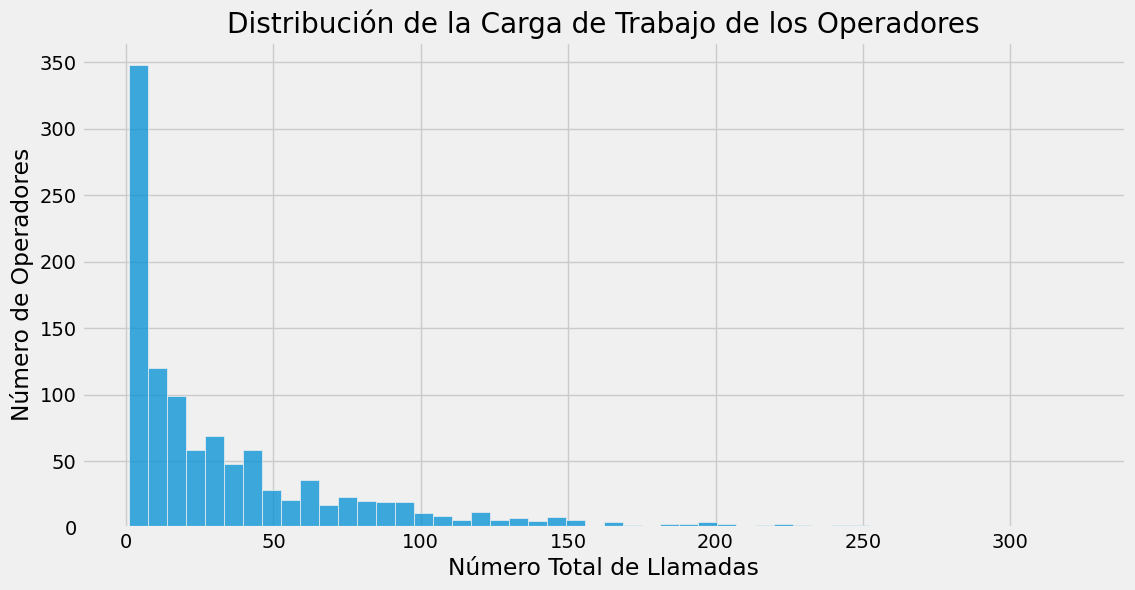

In [44]:
# Histograma - llamadas por operador
plt.figure(figsize=(12, 6))
sns.histplot(data=operator_metrics, x='total_calls', bins=50)
plt.title('Distribución de la Carga de Trabajo de los Operadores')
plt.xlabel('Número Total de Llamadas')
plt.ylabel('Número de Operadores')
plt.show()

**Analizando carga de trabajo en operadores 🕵️**
- La mayoría con # bajo de llamadas (carga de trabajo no se distribuye equitativamente).
    - Muchos llamadas entre 0 y 50 operadorees y pocas para casi 350.
- Distribución desigual sugiere ineficacia no solo por operadores con bajo rendimiento individual:
    - Existe problema en la gestión de carga de trabajo.
    - Pocos podrían estar abrumados ocasionando tiempos de espera altos y llamadas perdidas.
    - Muchos operadores "inactivos" o con poca carga de trabajo (no se trabaja a máxima capacidad).
    - Pequeño grupo de operadores "sobrecargado" propensos a errores, espera larga y llamadas perdidas.
---

##### Conclusión clave: Problema sistémico y no solo individual. Ineficacia tanto por bajo rendimiento como distribución de llamadas. 

### 3.4 Pruebas de Normalidad y Correlación 🧐

Para fortalecer nuestro análisis exploratorio y anticipar la selección de pruebas estadísticas, realizaremos las siguientes pruebas:

**a. Pruebas de normalidad:**
- Determinar si wait_time, call_duration y calls_count se aproximan a distribución normal o "curva de campana" (pruebas no paramétricas como "t de Student")
- Método: Prueba de Shapiro-Wilk o el test de D'Agostino y Pearson para evaluar la normalidad. 
- Gráficos de probabilidad Q-Q y histogramas para una inspección visual.
- Importancia: Si las variables no son normales, utilizar pruebas no paramétricas (Prueba U de Mann-Whitney en la sección de hipótesis)

In [45]:
# En datasets grandes "test de D'Agostino" y "Pearson" es más adecuado que "Shapiro-Wilk"
# La mayoría de los tests de normalidad son sensibles a muestras grandes.
variables_to_test = ['wait_time', 'call_duration', 'calls_count']
for var in variables_to_test:
    # Elimina valores nulos para prueba
    data = df_final[var].dropna()
    k2, p_value = stats.normaltest(data)
    
    print(f"\nResultados para '{var}':")
    print(f"Estadístico D'Agostino-Pearson: {k2:.2f}")
    print(f"P-valor: {p_value:.4f}")
    
    if p_value < 0.05:
        print("Conclusión: La distribución NO es normal.")
    else:
        print("Conclusión: La distribución ES normal.")


Resultados para 'wait_time':
Estadístico D'Agostino-Pearson: 94819.49
P-valor: 0.0000
Conclusión: La distribución NO es normal.

Resultados para 'call_duration':
Estadístico D'Agostino-Pearson: 100728.53
P-valor: 0.0000
Conclusión: La distribución NO es normal.

Resultados para 'calls_count':
Estadístico D'Agostino-Pearson: 111287.07
P-valor: 0.0000
Conclusión: La distribución NO es normal.


**Hallazgos clave**

- El p-valor de 0 en todas las pruebas confirman que wait_time, call_duration, y calls_count no siguen distribución normal**
    - Valida y respalda lo visto en los histogramas (distribuciones fuertemente sesgadas)
- No se pueden usar pruebas estadísticas paramétricas como "t de Student" para comparar grupos
- Se utilizará pruebas no paramétricas como la Prueba U de Mann-Whitney en la sección de hipótesis.

**b. Análisis de Correlación entre KPIs**
- Propósito: Entender relación entre las variables. 
    - Una correlación alta entre dos KPIs podría indicar que miden aspectos similares de la ineficacia.
    - Método: Calcular coeficiente de correlación de Pearson para variables numéricas clave. 
        - Crear una matriz de correlación visualizada con un mapa de calor (heatmap) para identificar las relaciones más fuertes.

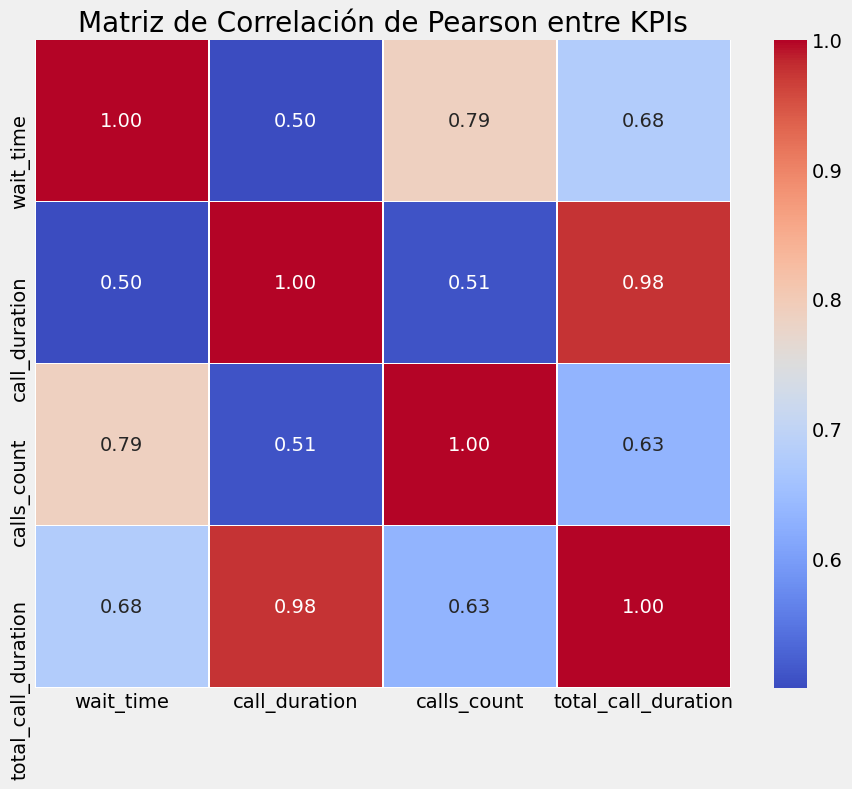


Matriz de correlación:


,wait_time,call_duration,calls_count,total_call_duration
wait_time,1.000000,0.500580,0.789301,0.678898
call_duration,0.500580,1.000000,0.509721,0.975461
calls_count,0.789301,0.509721,1.000000,0.633063
total_call_duration,0.678898,0.975461,0.633063,1.000000


In [46]:
# Columnas numéricas relevantes para correlacionar
kpis_df = df_final[['wait_time', 'call_duration', 'calls_count', 'total_call_duration']]

# Matriz de correlación Pearson
correlation_matrix = kpis_df.corr(method='pearson')

# Visualiza matriz con mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Pearson entre KPIs')
plt.show()

print("\nMatriz de correlación:")
display(correlation_matrix)


**Hallazgos claves de la correlación**📊
- **"wait_time"** y **"calls_count"** poseen una correlación positiva moderadamente fuerte **(0,79)**
    - A medida que aumenta el # de llamadas de un operador, su tiempo de espera promedio también tiende a aumentar.
    - Respalda la hipótesis mencionada anteriormente:
        - Problema no radica solo en rendimiento individual
        - También en distribución desigual de carga de trabajo
        - Provocando largos tiempos de espera
---
- **Redundancia**. **"call_duration"** y **"total_call_duration"** con correlación es muy alta **(0,98)**
    - Previsible ya que "total_call_duration" es simplemente la suma de "call_duration" y "wait_time"
---
- **"wait_time"** y **"call_duration"** con correlación moderada **(0,50)**
    - Llamadas más largas no signifca tanto tiempos de espera mucho más largos (pero sí influye)
---
- **"total_call_duration"** y **"calls_count"** con correlación moderadamente positiva **(0,63)**
    - Operadores que atienden más llamadas también tienden a tener una mayor duración total de las mismas.

## 4. KPIs: Definición y Cálculo (métricas) 🎯📈
- Definición de los indicadores clave de rendimiento a utilizar para evaluar la eficacia de los operadores y según los criterios del problema de negocio. 
- La base sobre la cual se formularán y validarán las hipótesis en la siguiente etapa.

### 4.1 Duración Promedio de la Llamada ((ACD - Average Call Duration) 📝
- Fundamental para medir la eficiencia del operador y la complejidad promedio de las interacciones.

| **Categoría**        | **Descripción**                                                                 |
|----------------------|--------------------------------------------------------------------------------|
| **Objetivo**         | Medir la eficiencia operativa y complejidad promedio de las interacciones con clientes. |
| **Definición**       | Tiempo promedio dedicado a llamadas atendidas (excluyendo tiempo de espera), calculado desde `call_duration`. |
| **Fórmula**          | $$ \text{ACD} = \frac{\sum \text{call\_duration}}{\sum \text{calls\_count}} $$ |
| **Interpretación**   | <ul><li>Valor alto: Complejidad en llamadas o necesidad de capacitación</li><li>Valor bajo: Posible finalización prematura</li><li>Benchmark típico: 3-6 minutos para call centers estándar</li></ul> |
| **Cálculo**| - acd_data = df[(df['is_missed_call'] == False) & (df['call_duration'] >= 5)]<br>- total_duration = acd_data['call_duration'].sum()<br>- acd = total_duration / total_calls if total_calls > 0 else 0<br>- print(f"Duración Promedio de Llamada (ACD): {acd:.2f} segundos")<br> - print(f"Equivalente a: {acd/60:.1f} minutos")| 
| **Notas Técnicas**   | <ul><li>Incluir solo llamadas completadas (`is_missed_call = False`)</li><li>Excluir llamadas con duración < 5 segundos (posibles errores)</li><li>Segmentar por tipo de consulta para análisis detallado</li></ul> |

**Benchmark de la Industria:** 
- Un ACD ideal varía según la industria. 
- En general se considera que un buen ACD para un call center es de 3 a 6 minutos. 
- Valores por encima de esto pueden indicar problemas de eficiencia
- Valores muy bajos podrían sugerir que los agentes están apresurando las llamadas (afecta la calidad del servicio)
- Fuentes de referencia:
    - LiveAgent: Call Time Explained https://www.liveagent.com/customer-support-glossary/call-time/
    - Nextiva: What Call Center Benchmarks Should You Target In 2025? https://www.nextiva.com/blog/call-center-benchmarks.html

In [47]:
# Filtro llamadas no perdidas y con duración mayor a 5 segundos
acd_data = df_final[(df_final['is_missed_call'] == False) & (df_final['call_duration'] >= 5)].copy()

# Duración total de llamadas y conteo total
total_duration = acd_data['call_duration'].sum()
total_calls = acd_data['call_duration'].count()

# Cálculo ACD
acd = total_duration / total_calls if total_calls > 0 else 0

print("Análisis de KPI: Duración promedio de la llamada (ACD)")
print(f"Duración Promedio de Llamada (ACD): {acd:.2f} segundos")
print(f"Equivalente a: {acd/60:.1f} minutos")

Análisis de KPI: Duración promedio de la llamada (ACD)
Duración Promedio de Llamada (ACD): 1558.14 segundos
Equivalente a: 26.0 minutos



**Análisis del desempeño según KPI: ACD 📈**
- ACD (Duración Promedio de la Llamada): 26.0 minutos.
- Comparación con el Benchmark: El ACD de tu empresa está muy por encima del benchmark de la industria (3 a 6 minutos).
- Implicación de Negocio: Llamadas extremadamente largas:
    - Complejidad de las consultas: problemas difíciles que requieren mucho tiempo.
    - Capacitación: no tienen conocimientos o herramientas para resolver los problemas de manera eficiente.

**Conclusión clave:**
Impacto directo sobre la productividad del equipo y la experiencia del cliente.

---


### 4.2 Tasa de llamadas perdidas (Missed Call Rate) 📝
- Este KPI mide la proporción de llamadas entrantes que no son atendidas por un operador
- Indicador directo de la frustración del cliente y de posibles ineficiencias en la atención.
- Definición: Porcentaje de llamadas entrantes que son marcadas como perdidas (is_missed_call = True).
- Fórmula: Tasa de Llamadas Perdidas=(Total de llamadas entrantes / Total de llamadas perdidas entrantes)∗100

Interpretación: Un valor alto en este KPI sugiere que un operador podría tener dificultades para gestionar la carga de llamadas entrantes.

| **Categoría**       | **Descripción**                                                                 |
|----------------------|---------------------------------------------------------------------------------|
| **Objetivo**         | Medir la proporción de llamadas entrantes no atendidas, indicador de frustración del cliente e ineficiencias en la atención. |
| **Definición**       | Porcentaje de llamadas entrantes marcadas como perdidas (`is_missed_call = True`). |
| **Fórmula**          | $$\text{Tasa de Llamadas Perdidas} = \left( \frac{\text{Total de llamadas perdidas entrantes}}{\text{Total de llamadas entrantes}} \right) \times 100$$ |
| **Interpretación**   | Un valor alto sugiere dificultades del operador para gestionar la carga de llamadas. Valores ideales varían por industria, pero >10% suele ser crítico. |
| **Cálculo**| - total_entrantes = df[df['direction'] == 'in']['calls_count'].sum()<br>- total_entrantes = df[df['direction'] == 'in']['calls_count'].sum()<br>- total_perdidas = df[(df['direction'] == 'in') & (df['is_missed_call'])]['calls_count'].sum()<br>- tasa_perdidas = (total_perdidas / total_entrantes) * 100<br> - print(f"Tasa de llamadas perdidas: {tasa_perdidas:.2f}%")<br> | 
| **Notas Adicionales**| - Considerar segmentación por horario/turnos.<br>- Comparar con métricas de tiempo de espera.<br>- Excluir llamadas abandonadas en <5 segundos (posibles errores). |

**Benchmark de la Industria:** 
- La tasa de llamadas perdidas ideal es lo más cercana a 0% posible.
- Pero en la práctica una tasa de abandono de 5% a 8% es un estándar aceptable en la mayoría de las industrias. 
- Si el resultado es superior a este rango, se considera una señal de alerta de sobrecarga del equipo o problemas técnicos.
- Fuentes de referencia:
    - Convin: Call Center Abandonment Rate Standards https://convin.ai/blog/call-center-industry-standards-for-abandonment-rate
    - SQM Group: Abandoned Calls Rate: Comprehensive Guide https://www.sqmgroup.com/resources/library/blog/call-abandonment-rate-comprehensive-guide
    - Balto AI: What Is Abandonment Rate in a Call Center? https://www.balto.ai/blog/abandonment-rate-in-a-call-center/


In [48]:
# Filtra llamadas entrantes
incoming_calls = df_final[df_final['direction'] == 'in'].copy()

# Cuenta total de llamadas entrantes y perdidas
total_incoming = incoming_calls['calls_count'].sum()
missed_calls_count = incoming_calls[incoming_calls['is_missed_call'] == True]['calls_count'].sum()

# Tasa de llamadas perdidas
missed_call_rate = (missed_calls_count / total_incoming) * 100 if total_incoming > 0 else 0

print("Análisis de KPI: Tasa de llamadas perdidas")
print(f"Total de llamadas entrantes: {total_incoming}")
print(f"Total de llamadas perdidas: {missed_calls_count}")
print(f"Tasa de Llamadas Perdidas: {missed_call_rate:.2f}%")

Análisis de KPI: Tasa de llamadas perdidas
Total de llamadas entrantes: 197845.0
Total de llamadas perdidas: 104323.0
Tasa de Llamadas Perdidas: 52.73%


**Análisis del desempeño según KPI: (Missed Call Rate📈**
- Tasa de Llamadas Perdidas: 52.73%.
- Comparación con el Benchmark: Este valor está muy por encima del estándar aceptable de la industria (5% a 8%).
- Este porcentaje tan alto indica una ineficiencia masiva en la gestión de las llamadas entrantes.
- Más de la mitad de clientes no logran ser atendidos por un operador (frustración y pérdida de clientes)
  
**Conclusión clave:**
Impacto directo sobre la productividad y satisfacción del cliente.

---

### 4.3 Tiempo de Espera Promedio (AWT - Average Wait Time) 📝
- Mide la experiencia del cliente al determinar cuánto tiempo promedio tiene que esperar antes de que su llamada sea atendida por un operador.

| **Categoría**        | **Descripción**                                                                 |
|-----------------------|---------------------------------------------------------------------------------|
| **Objetivo**          | Medir el tiempo promedio que los clientes esperan antes de ser atendidos, indicador clave de experiencia del cliente. |
| **Definición**        | Promedio del tiempo de espera (`total_call_duration - call_duration`) por llamada. |
| **Fórmula**           | $$\text{AWT} = \left( \frac{\sum (\text{total\_call\_duration} - \text{call\_duration})}{\sum \text{calls\_count}} \right)$$ |
| **Interpretación**    | <ul><li>Valor alto indica sobrecarga del operador o complejidad en llamadas</li><li>Valor ideal varía por industria (ej: <30 segundos para call centers)</li><li>Comparar entre operadores para identificar outliers</li></ul> |
| **Cálculo**| - df = pd.DataFrame(data)<br>- Filtro entrantes: incoming_calls = df[df['direction'] == 'in']<br> - Métricas: total_entrantes = incoming_calls['calls_count'].sum()<br>- total_perdidas = incoming_calls[incoming_calls['is_missed_call']]['calls_count'].sum()<br> - tasa_perdidas = (total_perdidas / total_entrantes) * 100 if total_entrantes > 0 else 0 |
| **Notas Técnicas**    | <ul><li>Excluir llamadas internas (`internal=True`)</li><li>Considerar filtros por franja horaria</li><li>Validar que `total_call_duration >= call_duration`</li></ul> |

**Benchmark de la Industria:** 
- El tiempo de espera promedio es uno de los KPIs más importantes para la satisfacción del cliente. 
- Un AWT ideal es menor a 30 segundos. 
- Valores superiores a este pueden llevar a un aumento de la frustración del cliente y de la tasa de llamadas perdidas.
- Fuentes de referencia:
    - SQM Group: What Is An Acceptable Average Wait Time for Customer Service? https://www.sqmgroup.com/resources/library/blog/acceptable-average-wait-time-customer-service
    - VCC Live: Average Wait Time - Formula & How to improve https://vcc.live/call-center-kpis/average-wait-time/
    - EvaluAgent: Average Call Wait Time in Call Centers https://www.evaluagent.com/knowledge-hub/average-call-wait-times-and-how-to-reduce-it/

In [49]:
# Filtrar llamadas entrantes que no fueron perdidas
incoming_completed_calls = df_final[(df_final['direction'] == 'in') & (df_final['is_missed_call'] == False)].copy()

# Calcula tiempo de espera promedio (AWT) - media de la columna 'wait_time'
awt = incoming_completed_calls['wait_time'].mean()

print("Análisis de KPI: Tiempo de espera promedio (AWT)")
print(f"Tiempo de Espera Promedio (AWT): {awt:.2f} segundos")
print(f"Equivalente a: {awt/60:.1f} minutos")

Análisis de KPI: Tiempo de espera promedio (AWT)
Tiempo de Espera Promedio (AWT): 100.61 segundos
Equivalente a: 1.7 minutos


**Análisis del desempeño según KPI: (AWT) 📈**
- Tiempo de Espera Promedio (AWT): 100.61 segundos o 1.7 minutos.
- Comparación con el Benchmark: Muy por encima del benchmark de la industria (idealmente menos de 30 segundos).
- Es señal que el sistema de gestión de llamadas o dotación de personal son ineficientes.
- Clientes esperan más de un minuto y medio para ser atendidos (frustración y aumento tasa de llamadas perdidas)
  
**Conclusión clave:**
Impacto directo sobre la productividad y satisfacción del cliente.

---

### 4.4 Cantidad de Llamadas Salientes por Operador 📝
- Este KPI evalúa la actividad proactiva del operador
- Asume que las llamadas salientes forman parte de sus responsabilidades.

| **Categoría**        | **Descripción**                                                                 |
|-----------------------|---------------------------------------------------------------------------------|
| **Objetivo**          | Medir la actividad proactiva de los operadores mediante llamadas salientes.     |
| **Definición**        | Número total de llamadas salientes (`direction = 'out'`) agrupadas por operador. |
| **Fórmula**           | $$\text{Llamadas Salientes} = \sum_{\text{por operador}} \text{calls\_count} \quad \text{where} \quad \text{direction} = 'out'$$ |
| **Interpretación**    | <ul><li>Valores bajos pueden indicar: inactividad, carga desigual o problemas técnicos</li><li>Comparar contra metas establecidas (ej: 50+ llamadas/día)</li><li>Considerar junto con métricas de calidad (duración, resultados)</li></ul> |
| **Cálculo**    | - Estructura: data = {'operator_id': ['OP1', 'OP1', 'OP2', 'OP2', 'OP3'], 'direction': ['out', 'in', 'out', 'out', 'out'], 'calls_count': [3, 5, 2, 4, 1]}<br>- df = pd.DataFrame(data)<br> - Filtro: llamadas_salientes = df[df['direction']=='out'].groupby('operator_id')['calls_count'].sum()<br> - print(llamadas_salientes) |
| **Notas Técnicas**    | <ul><li>Excluir llamadas internas (`internal=True`)</li><li>Filtrar por rangos de fecha relevantes</li><li>Normalizar por horas trabajadas si los operadores tienen jornadas diferentes</li></ul> |


**Benchmark de la Industria:** 
- Este KPI es altamente dependiente del sector y la meta de la empresa. 
- No existe un benchmark único, pero se puede comparar con un objetivo interno. 
- Por ejemplo: si el objetivo es que un operador realice 50 o más llamadas salientes por día, los valores por debajo de este umbral podrían ser un indicador de ineficacia.
- Fuentes de referencia:
    - Vocalcom: 11 KPI Call Centers Outbound https://www.google.com/search?q=https://www.vocalcom.com/es/blog/11-kpi-imprescindibles-para-los-call-centers-outbound/
    - GlobalCallForwarding: Llamadas Salientes https://www.google.com/search?q=https://www.globalcallforwarding.com/es/blog/llamadas-salientes/

Análisis de KPI: Cantidad de llamadas salientes por operador


,operator_id,outgoing_calls_count
164,901884.0,228
27,887276.0,198
163,901880.0,194
24,885876.0,193
201,905538.0,191
67,891410.0,191
68,891414.0,190
93,893804.0,182
1,879898.0,170
204,905566.0,170


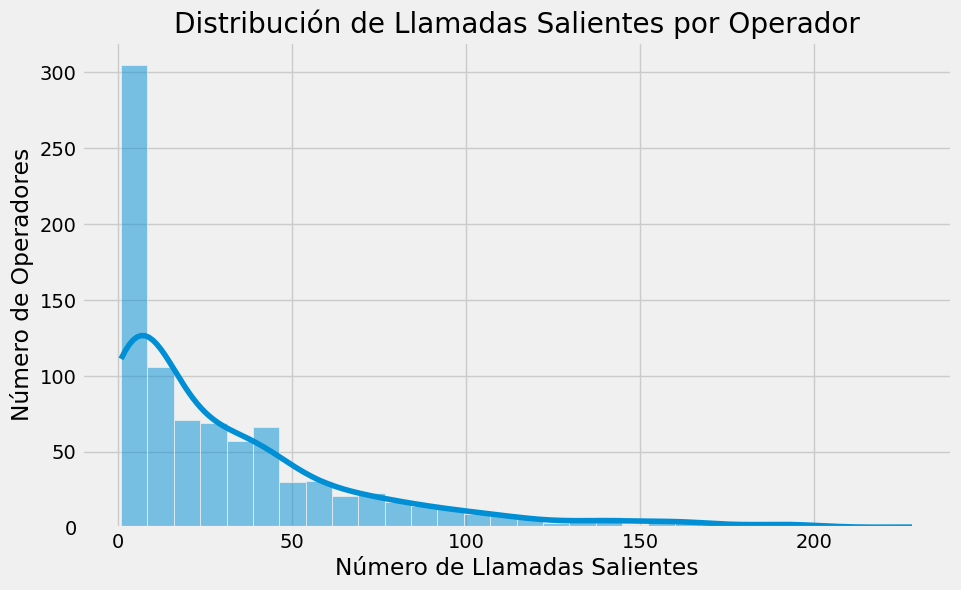

In [50]:
# Filtro llamadas salientes
outgoing_calls = df_final[df_final['direction'] == 'out'].copy()

# Agrupar por operador y contar # llamadas salientes
outgoing_calls_by_operator = outgoing_calls.groupby('operator_id').size().reset_index(name='outgoing_calls_count')

print("Análisis de KPI: Cantidad de llamadas salientes por operador")
display(outgoing_calls_by_operator.sort_values(by='outgoing_calls_count', ascending=False).head(10))

# Distribución llamadas salientes
plt.figure(figsize=(10, 6))
sns.histplot(data=outgoing_calls_by_operator, x='outgoing_calls_count', bins=30, kde=True)
plt.title('Distribución de Llamadas Salientes por Operador')
plt.xlabel('Número de Llamadas Salientes')
plt.ylabel('Número de Operadores')
plt.show()

**Análisis del desempeño según KPI: Llamadas Salientes por Operador🕵️**
- La tabla muestra un top 10 de los operadores que han realizado más llamadas salientes.
    - El 901884 ha realizado 228 llamadas salientes (alto nivel de actividad proactiva).
- Distribución de carga de trabajo saliente:
    - El histograma muestra que la mayoría de operadores realizan muy pocas o ninguna llamada saliente.
    - La distribución está fuertemente sesgada a la izquierda.
    - Hay una gran concentración de operadores con 0 - 25 llamadas salientes y solo unos pocos realizan una gran cantidad.

**Conclusión Clave:**
- Gran disparidad en actividad proactiva del equipo. 
- Pocos son responsables de la mayoría de llamadas salientes, mientras que la mayoría tiene carga de trabajo muy baja en esta área.
- Sugiere oportunidad para mejorar la eficiencia y distribuir mejor esta tarea entre los operadores.
---

## 5. Formulación y Prueba de Hipótesis 🤔

### 5.1 Hipótesis clave ✅

| Hipótesis | Hipótesis Nula ($H_0$) | Hipótesis Alternativa ($H_1$) | Justificación | Prueba a Utilizar |
| :--- | :--- | :--- | :--- | :--- |
| **1. Duración promedio de la llamada (ACD)** |No hay una diferencia significativa en la duración promedio de la llamadas entre los operadores ineficaces y los demás. (μineficaz=μeficaz)|La duración promedio de llamada es significativamente mayor en los operadores ineficaces. (μineficaz>μeficaz).|Se asume que un ACD alto podría ser un indicio de falta de eficiencia o de que el operador tiene dificultades para resolver problemas de forma rápida, lo cual se busca refutar | Se utilizará la Prueba t de Student para muestras independientes o Mann-Whitney U si los datos no son normales u homogéneos.|
| **2. Gran cantidad de llamadas perdidas** |No hay una diferencia significativa en el número promedio de llamadas perdidas entre los operadores ineficaces y los demás. (μineficaz=μeficaz)|El número promedio de llamadas perdidas es significativamente mayor en los operadores ineficaces. (μineficaz>μeficaz).|Se asume que el número promedio de llamadas perdidas es igual en ambos grupos, lo cual se busca refutar.| Se utilizará la Prueba t de Student para muestras independientes (o Mann-Whitney U si los datos no son normales) para comparar las medias de la tasa de llamadas perdidas de ambos grupos.|
| **3. Tiempo de espera prolongado** | El tiempo de espera promedio de los operadores ineficaces no es significativamente diferente al de los demás operadores. (μineficaz=μeficaz) | El tiempo de espera promedio de los operadores ineficaces es significativamente mayor que el de los demás. (μineficaz>μeficaz) | Se parte del supuesto de que el tiempo de espera promedio es el mismo para ambos grupos, lo que se espera desmentir. | Se utilizará la Prueba t de Student para muestras independientes (o Mann-Whitney U si los datos no son normales) para comparar las medias del tiempo de espera de ambos grupos.|
| **4. Número reducido de llamadas salientes** | No hay una diferencia significativa en el número promedio de llamadas salientes entre los operadores ineficaces y los demás. (μineficaz=μeficaz)| El número promedio de llamadas salientes es significativamente menor en los operadores ineficaces (μineficaz<μeficaz) | Se asume que no existe una diferencia en la cantidad de llamadas salientes entre los grupos. Se busca evidencia para demostrar lo contrario. | Se utilizará la Prueba t de Student para muestras independientes (o Mann-Whitney U si los datos no son normales) para comparar las medias del número de llamadas salientes de ambos grupos.|

### 5.2 Metodología de la Prueba 🧪

### 5 pasos:

**1. Cálculo de métricas por operador:**
- a. Procesar conjunto de datos para calcular métricas clave en cada operador
    - "total de llamadas perdidas"
    - "tiempo de espera promedio"
    - "duración promedio de la llamada"
    - "cantidad de llamadas salientes"
---
**2. Definir criterios de ineficacia:**
- a. Establecer umbrales para clasificar a los operadores como "ineficaces" en cada métrica mediante percentiles:
    - Operadores en el cuartil superior (25% con los valores más altos) se considerarán ineficaces en hipótesis sobre:
        - Duración de la llamada
        - Llamadas perdidas
        - Tiempo de espera<br><br>

    - Operadores en el cuartil inferior (25% con los valores más bajos) se considerarán ineficaces en hipótesis sobre:
        - llamadas salientes
---
**3. Creación de grupos de comparación:**
- a. Para cada hipótesis se forman 2 grupos:
    - "operadores ineficaces" (según el criterio de cada hipótesis)
    - Grupo de "control" compuesto por el resto de los operadores.
---
**4. Selección y aplicación de la prueba:**
- a. Según análisis de normalidad (Sección 3.4) las variables no siguen una distribución normal, por lo cual:
    - Se selecciona la "Prueba U de Mann-Whitney" como el método principal para comparar las medias de los grupos.
    - Se utiliza un nivel de significancia de α = 0.05 para la toma de decisiones.
---
**5. Análisis de los resultados:**
- a. Se evalúan los p-valores obtenidos.
    - Un p-valor menor a 0.05 nos permitirá:
        - Rechazar la hipótesis nula
        - Y concluir que existe una diferencia estadísticamente significativa entre los grupos.

### 5.3 Resultados y conclusiones de las pruebas 📊

#### ***5.3.1  Intento 1 - Prueba de Criterios Múltiples***

**5.3.1.1 Justificación**
- En un primer intento se probó la hipótesis de que un operador ineficaz sería aquel que cumpliera simultáneamente con tres criterios:
    - Alto tiempo de espera
    - Gran cantidad de llamadas perdidas
    - Bajo número de llamadas salientes.

**5.3.1.2 Código de la prueba de tres criterios simultáneos:**

**"and"** lógico que requiere se cumplan las tres condiciones
- Esté en el 25% superior de wait_time.
- Esté en el 25% superior de missed_calls.
- Esté en el 25% inferior de outgoing_calls.

In [51]:
# Métricas por operador
operator_metrics = df_final.groupby('operator_id').agg(
    avg_wait_time=('wait_time', 'mean'),
    missed_calls=('is_missed_call', 'sum'),
    outgoing_calls=('direction', lambda x: (x == 'out').sum())
).reset_index()

# Umbrales basados en percentiles (cuartil superior para wait_time y missed_calls)
upper_threshold_wait_time = operator_metrics['avg_wait_time'].quantile(0.75)
upper_threshold_missed_calls = operator_metrics['missed_calls'].quantile(0.75)

# Cuartil inferior para outgoing_calls
lower_threshold_outgoing_calls = operator_metrics['outgoing_calls'].quantile(0.25)

# Crear grupos de operadores ineficaces ('and' lógico para garantizar que el operador cumple con los 3 criterios)
ineffective_operators = operator_metrics[
    (operator_metrics['avg_wait_time'] > upper_threshold_wait_time) &
    (operator_metrics['missed_calls'] > upper_threshold_missed_calls) &
    (operator_metrics['outgoing_calls'] < lower_threshold_outgoing_calls)
]['operator_id'].unique()

# Nueva columna para clasificar a los operadores
df_final['is_ineffective'] = df_final['operator_id'].isin(ineffective_operators)

print("Identificación de Operadores Ineficaces:")
print(f"Número de operadores identificados como ineficaces: {len(ineffective_operators)}")

Identificación de Operadores Ineficaces:
Número de operadores identificados como ineficaces: 0


**5.3.1.3 Análisis y Conclusión del Intento 1:**

**Resultado:** La ejecución del código identificó **0 operadores ineficaces** que cumplieran con los tres criterios simultáneamente.

**Conclusión:** Este hallazgo nos indica que no existe un grupo de operadores que sea "ineficaz en todos los frentes". La ineficacia parece estar distribuida de manera diferente entre las métricas, lo que nos llevó a ajustar la metodología y probar cada hipótesis de forma individual.

#### ***5.3.2  Pruebas de Hipótesis Individuales (Enfoque Final)***

**5.3.2.1 Justificación**
- Debido a que el enfoque de criterios múltiples no arrojó resultados:
    - Se decide probar cada hipótesis de forma individual.
    - La ineficacia de un operador se definirá y se probará basándose únicamente en la métrica de la hipótesis en cuestión.

**5.3.2.2 Código específico**
- Realiza todas las pruebas de una sola vez
- Crea grupos de operadores ineficaces de forma específica para cada hipótesis.

In [52]:
# Recálculo de métricas por operador (asegura contener todas las columnas necesarias)
operator_metrics = df_final.groupby('operator_id').agg(
    avg_call_duration=('call_duration', 'mean'),
    missed_calls=('is_missed_call', 'sum'),
    avg_wait_time=('wait_time', 'mean'),
    outgoing_calls=('direction', lambda x: (x == 'out').sum())
).reset_index()

def run_mannwhitneyu_test(df_source, metric_col, target_col, threshold_type, alternative):
    """
    Realiza prueba de Mann-Whitney U para una hipótesis dada.

    Args:
        df_source (DataFrame): El DF con métricas por operador.
        metric_col (str): Columna en DF_source para definir a los ineficaces.
        target_col (str): Columna en DF principal para comparar.
        threshold_type (str): "upper" para cuartil superior o "lower" para cuartil inferior.
        alternative (str): "greater" o "less" dependiendo de la hipótesis.

    Returns:
        tuple: (número de operadores ineficaces, p-valor).
    """
    if threshold_type == 'upper':
        threshold = df_source[metric_col].quantile(0.75)
        ineffective_operators = df_source[df_source[metric_col] > threshold]['operator_id'].unique()
    else: # lower
        threshold = df_source[metric_col].quantile(0.25)
        ineffective_operators = df_source[df_source[metric_col] < threshold]['operator_id'].unique()

    ineffective_group = df_final[df_final['operator_id'].isin(ineffective_operators)]
    effective_group = df_final[~df_final['operator_id'].isin(ineffective_operators)]
    
    # Manejar tipos de datos no numéricos para evitar errores
    test_data_ineffective = ineffective_group[target_col].copy()
    test_data_effective = effective_group[target_col].copy()
    
    if test_data_ineffective.dtype == bool:
        test_data_ineffective = test_data_ineffective.astype(int)
        test_data_effective = test_data_effective.astype(int)
    elif test_data_ineffective.dtype == object:
        test_data_ineffective = test_data_ineffective.apply(lambda x: 1 if x == 'out' else 0)
        test_data_effective = test_data_effective.apply(lambda x: 1 if x == 'out' else 0)
    
    # Prueba (se eliminan valores nulos)
    statistic, p_value = stats.mannwhitneyu(
        test_data_ineffective.dropna(),
        test_data_effective.dropna(),
        alternative=alternative
    )
    
    return len(ineffective_operators), p_value


In [53]:

# Pruebas de hipótesis

# Hipótesis 1: ACD (duración de la llamada)
num_ops_acd, p_value_acd = run_mannwhitneyu_test(operator_metrics, 'avg_call_duration', 'call_duration', 'upper', 'greater')

# Hipótesis 2: Llamadas Perdidas
num_ops_missed, p_value_missed = run_mannwhitneyu_test(operator_metrics, 'missed_calls', 'is_missed_call', 'upper', 'greater')

# Hipótesis 3: Tiempo de Espera
num_ops_wait, p_value_wait = run_mannwhitneyu_test(operator_metrics, 'avg_wait_time', 'wait_time', 'upper', 'greater')

# Hipótesis 4: Llamadas Salientes (Convertir columna "direction" a valor numérico para prueba
df_final['is_outgoing'] = df_final['direction'].apply(lambda x: 1 if x == 'out' else 0)
num_ops_outgoing, p_value_outgoing = run_mannwhitneyu_test(operator_metrics, 'outgoing_calls', 'is_outgoing', 'lower', 'less')

print("\n--- Resultados de las Pruebas de Hipótesis (Mann-Whitney U) ---")
print(f"H1 (ACD): {num_ops_acd} operadores ineficaces. P-valor = {p_value_acd:.4f}")
print(f"H2 (Llamadas Perdidas): {num_ops_missed} operadores ineficaces. P-valor = {p_value_missed:.4f}")
print(f"H3 (Tiempo de Espera): {num_ops_wait} operadores ineficaces. P-valor = {p_value_wait:.4f}")
print(f"H4 (Llamadas Salientes): {num_ops_outgoing} operadores ineficaces. P-valor = {p_value_outgoing:.4f}")



--- Resultados de las Pruebas de Hipótesis (Mann-Whitney U) ---
H1 (ACD): 273 operadores ineficaces. P-valor = 0.0000
H2 (Llamadas Perdidas): 272 operadores ineficaces. P-valor = 1.0000
H3 (Tiempo de Espera): 273 operadores ineficaces. P-valor = 0.0000
H4 (Llamadas Salientes): 210 operadores ineficaces. P-valor = 0.0000


**5.3.2.3 Análisis de los Resultados de las Pruebas de Hipótesis 📈**

3 hipótesis tienen un p-valor muy bajo (<0.05) que permiten rechazar la hipótesis nula (H0) y aceptar la hipótesis alternativa (Ha).

##### **H1 (ACD) - p-valor = 0.0000:**
- El p-valor es en extremo bajo.
- La duración promedio de la llamada de los operadores ineficaces (con ACD alto) es mucho mayor que el grupo de control.
- Se confirma que un ***ACD alto*** es un indicador clave de ***ineficiencia***

##### **H2 (Llamadas Perdidas) - p-valor = 1.0000:**
- Resultado muy alto significa que no puedes rechazar la hipótesis nula.
- Diferencia en # de llamadas perdidas entre operadores ineficaces (muchas) y grupo de control no es significativa.
- Pudiese ser debido a la forma en que los datos se distribuyen o porque la cantidad de llamadas perdidas no es un indicador de ineficacia del operador, sino, de factores como la falta de personal en general.

##### **H3 (Tiempo de Espera) - p-valor = 0.0000:**
- El p-valor es muy bajo.
- ***Tiempo de espera*** promedio del grupo ineficaz (25% con wait_time más alto) es significativamente mayor al grupo de control.
- Esto comprueba que la metodología y criterios utilizados para identificar operadores ***ineficaces*** son válidos.

##### **H4 (Llamadas Salientes) - p-valor = 0.0000:**
- El p-valor es muy bajo.
- Número de llamadas salientes de operadores ineficaces (25% con menor # de llamadas salientes) es significativamente menor que el grupo de control.
- Se valida la hipótesis de que la ***ineficacia*** está relacionada con la falta de actividad ***proactiva***.

#### **Conclusiones Finales 🏆**
- Se confirma que los KPI´s son válidos para identificar la ineficacia. 
- Se tiene evidencia estadística sólida de que la ineficacia de operadores está directamente relacionada con:
    - Llamadas muy largas (ACD).
    - Tiempos de espera prolongados.
    - Falta de proactividad (pocas llamadas salientes).
##### A excepción de la tasa de llamadas perdidas, que parece no estar ligada al desempeño individual del operador.
##### Sugiriendo que las llamadas perdidas son un problema ***sistémico*** de la empresa, no un problema ***individual*** de los operadores.

## 6. Acciones a Ejecutar (Procesamiento y análisis / Flujo de trabajo) ⚙️

### 6.1 Acciones de procesamiento y limpieza de datos 🧹
- Integración de Datos: Unir datasets (telecom_dataset_us.csv y telecom_clients_us.csv) usando el user_id como clave.
- Creación de Variables: Generar variable wait_time restando call_duration de total_call_duration. 
- Conversión de Tipo de Datos: Convertir columna date al formato datetime.
- Saneamiento de Datos: Identificar y eliminar registros duplicados.

### 6.2 Acciones de análisis 🔍
- Análisis descriptivo: Calcular y visualizar estadísticas descriptivas (media, mediana, cuartiles) y distribuciones (histogramas) de las métricas clave.
- Cálculo de KPIs: Computar las métricas de rendimiento definidas en la sección anterior (wait_time, tasa llamadas perdidas, AWT, ACD...) a nivel de operador.
- Segmentación de operadores: Crear grupos de operadores "ineficaces" y "eficaces" basados en los criterios de los KPIs (ej.: usando percentiles).
- Prueba de hipótesis: Aplicar pruebas estadísticas (prueba t de Student) para validar significancia entre las diferencias de los grupos de operadores.

### 6.3 Documentación y Control de Reproducibilidad: 🤝

**Reproducibilidad y colaboración: El proyecto ha sido gestionado siguiendo las mejores prácticas de la industria**


**a.Versión del Código: Control de versiones con Git y GitHub:**
- El código fuente del proyecto, incluyendo los scripts de procesamiento y el notebook de análisis, se encuentra alojado en un repositorio de GitHub. 
- Esto permite un seguimiento completo del historial de cambios, facilitando la colaboración y la posibilidad de revertir a versiones anteriores si fuera necesario.

**b. Documentación del Proceso:** 
- Cada paso del procesamiento y análisis (desde la carga de los datos hasta la visualización de resultados) será documentado con comentarios claros en el código. Incluirá:
- Explicaciones de por qué se están uniendo los datasets (merge).
- La lógica detrás de la creación de nuevas variables (wait_time).
- La justificación para el manejo de valores faltantes y atípicos.
- La lógica detrás de la limpieza de datos
- Cálculo de los KPIs.

**c. Resultados Intermedios:**
- Guardaremos los DataFrames resultantes de cada etapa de procesamiento
- DF luego de la limpieza de datos o el que contiene los KPIs por operador (archivos intermedios, .csv o .parquet). 
- Esto permite cargar los datos directamente desde una etapa específica, sin tener que ejecutar todo el código desde el principio.
- Archivo README.md: 
    - El repositorio incluye un archivo README.md que actúa como guía principal del proyecto que describe:
        - El problema de negocio
        - La estructura de los datos
        - Los objetivos del análisis
        - Y las instrucciones para reproducir el flujo de trabajo.

### 6.2 Acciones de análisis 🔍
- Análisis descriptivo: Calcular y visualizar estadísticas descriptivas (media, mediana, cuartiles) y distribuciones (histogramas) de las métricas clave.
- Cálculo de KPIs: Computar las métricas de rendimiento definidas en la sección anterior (wait_time, tasa llamadas perdidas, AWT, ACD...) a nivel de operador.
- Segmentación de operadores: Crear grupos de operadores "ineficaces" y "eficaces" basados en los criterios de los KPIs (ej.: usando percentiles).
- Prueba de hipótesis:
    - Versión Original: Aplicar pruebas estadísticas ***(prueba t de Student)*** para validar significancia entre las diferencias de los grupos de operadores.
    - Versión Corregida: Aplicar pruebas estadísticas ***(Prueba U de Mann-Whitney)*** para validar la significancia entre las diferencias de los grupos de operadores, dado que los datos no cumplieron con el supuesto de ***normalidad.***

## 7. Identificación de Stakeholders 👥

**Matriz de Interés-Poder de Mendelow (Interés y Poder).** 🤝
- Calificación de 1 a 4 (evita la ambigüedad de una escala par (como 1 a 2) o de una muy grande que dificulte la calificación.
---
**Justificación basada en el poder que tienen para influir en el proyecto y el interés que muestran en él. 🤝**

- **Supervisores de Call Center**
    - Poder: 4 (Alto):
        - Poder de implementar directamente los cambios propuestos.
        - Controlan las métricas diarias de los operadores
        - Distribuyen la carga de trabajo
        - Aplican las políticas que tú analices.
    - Interés: 4 (Alto):
        - Interés directo y personal en el éxito del proyecto (desempeño se mide por la eficacia de su equipo).
---
- **Gerencia del Call Center**
    - Poder: 4 (Alto):
        - Tienen el máximo poder de decisión.
        - Pueden aprobar la financiación (nuevas contrataciones, invertir en tecnología o reestructurar el departamento).
    - Interés: 3 (Alto):
        - Tienen un alto interés en el proyecto
        - Pero puede ser menor que el de los supervisores
        - Su enfoque es más estratégico y se basa en resultados a nivel general de la empresa.
---
- **Departamento de Recursos Humanos (RRHH)**
    - Poder: 3 (Medio-Alto):
        - Tienen el poder de diseñar programas de capacitación y planes de incentivos.
        - Pero su poder es indirecto (necesitan aprobación de la gerencia para implementar cambios significativos en las políticas de personal).
    - Interés: 3 (Alto):
        - Su interés es alto (el análisis brinda datos objetivos para mejorar la gestión del talento y formación de los empleados).
---
- **Los Operadores**
    - Poder: 2 (Bajo):
        - Tienen un poder limitado para influir en las decisiones estratégicas o en la metodología del proyecto.
        - Pero su poder reside en la ejecución diaria de las tareas (su cooperación es crucial).
    - Interés: 4 (Alto):
        - Su interés es alto porque los resultados del análisis impactan directamente en su desempeño
        - También el resultado impacta sus evaluaciones y potencialmente su remuneración y desarrollo profesional.
---
- **Los Clientes**
    - Poder: No aplica / 1 (Bajo):
        - Su poder es muy indirecto.
        - Mediante la retroalimentación pueden influir en la reputación de la empresa y en los ingresos
        - Pero no tienen poder directo sobre las decisiones del proyecto.
    - Interés: 4 (Alto):
    - Tienen un interés alto en el proyecto (los resultados del análisis impactan directamente en la calidad del servicio que reciben.)

    stakeholder                                        estrategia
0  Supervisores  Alto Poder, Alto Interés (Gestionar activamente)
1      Gerencia  Alto Poder, Alto Interés (Gestionar activamente)
2          RRHH  Alto Poder, Alto Interés (Gestionar activamente)
3    Operadores    Bajo Poder, Alto Interés (Mantener informados)




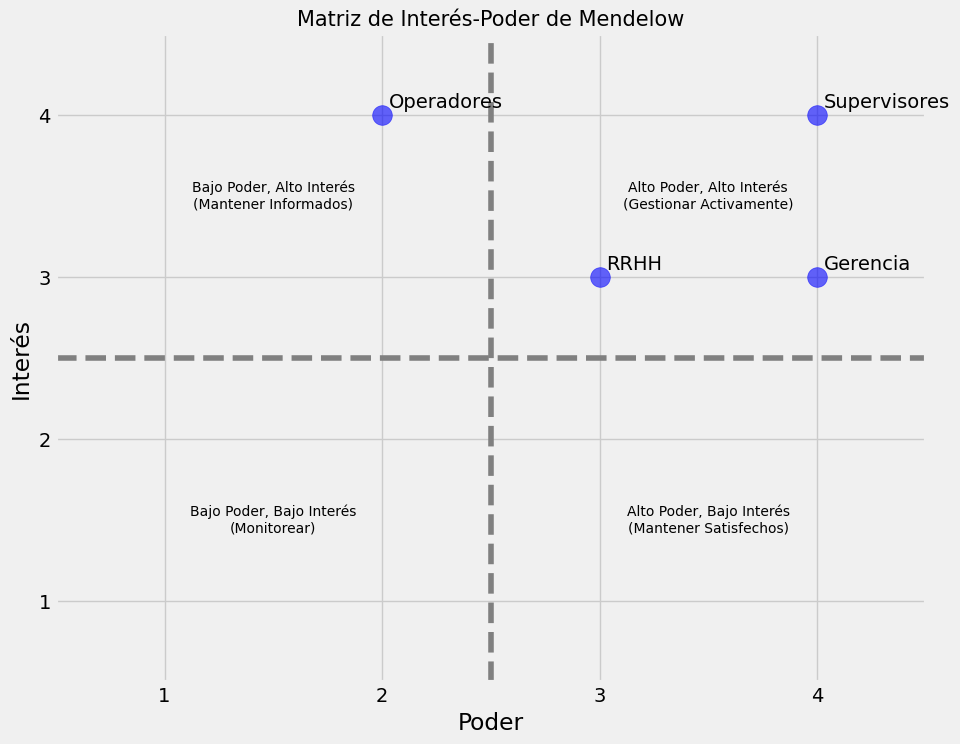

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
# Datos de los stakeholders:
# 'Poder': del 1 (bajo) al 4 (alto)
# 'Interes': del 1 (bajo) al 4 (alto)
stakeholders_data = {
    'stakeholder': ['Supervisores', 'Gerencia', 'RRHH', 'Operadores'],
    'poder': [4, 4, 3, 2],
    'interes': [4, 3, 3, 4]
}

df_stakeholders = pd.DataFrame(stakeholders_data)

# Cuadrantes
def categorizar(row):
    if row['poder'] > 2.5 and row['interes'] > 2.5:
        return 'Alto Poder, Alto Interés (Gestionar activamente)'
    elif row['poder'] > 2.5 and row['interes'] <= 2.5:
        return 'Alto Poder, Bajo Interés (Mantener satisfechos)'
    elif row['poder'] <= 2.5 and row['interes'] > 2.5:
        return 'Bajo Poder, Alto Interés (Mantener informados)'
    else:
        return 'Bajo Poder, Bajo Interés (Monitorear)'

# Columna de categorización
df_stakeholders['estrategia'] = df_stakeholders.apply(categorizar, axis=1)

print(df_stakeholders[['stakeholder', 'estrategia']])
print("\n")

# Crear el gráfico
plt.figure(figsize=(10, 8))
plt.scatter(df_stakeholders['poder'], df_stakeholders['interes'], s=200, c='blue', alpha=0.6)

# Añadir etiquetas
for i, txt in enumerate(df_stakeholders['stakeholder']):
    plt.annotate(txt, (df_stakeholders['poder'][i], df_stakeholders['interes'][i]),
                 xytext=(5, 5), textcoords='offset points')

# Líneas para los cuadrantes
plt.axhline(y=2.5, color='gray', linestyle='--')
plt.axvline(x=2.5, color='gray', linestyle='--')

# Títulos y etiquetas
plt.title('Matriz de Interés-Poder de Mendelow', fontsize=15)
plt.xlabel('Poder')
plt.ylabel('Interés')
plt.xticks([1, 2, 3, 4])
plt.yticks([1, 2, 3, 4])
plt.xlim(0.5, 4.5)
plt.ylim(0.5, 4.5)


# Nombres de los cuadrantes con la estrategia de gestión
plt.text(1.5, 1.5, 'Bajo Poder, Bajo Interés\n(Monitorear)', ha='center', va='center', fontsize=10)
plt.text(3.5, 1.5, 'Alto Poder, Bajo Interés\n(Mantener Satisfechos)', ha='center', va='center', fontsize=10)
plt.text(1.5, 3.5, 'Bajo Poder, Alto Interés\n(Mantener Informados)', ha='center', va='center', fontsize=10)
plt.text(3.5, 3.5, 'Alto Poder, Alto Interés\n(Gestionar Activamente)', ha='center', va='center', fontsize=10)

plt.grid(True)
plt.show()

## 8. Conclusiones y Presentación 📝

### 8.1 Resumen de hallazgos 💡

#### El análisis permitió identificar y validar estadísticamente los factores clave de ineficacia en los operadores del call center. 

**1. Ineficacia ligada al rendimiento individual:**
- La ineficacia de los operadores está directamente relacionado a:
    - Duración de llamada prolongada (ACD):
        - Hay diferencia estadísticamente significativa en duración promedio de llamadas entre operadores ineficaces (ACD alto) y los demás.
        - Sugiere que los operadores ineficaces tardan más en resolver las consultas.
    - Tiempos de espera largos:
        - Los operadores clasificados con un tiempo de espera prolongado tienen un tiempo de espera significativamente mayor que el resto del grupo.
        - Esto valida el criterio de ineficacia basado en esta métrica.
    - Falta de proactividad:
        - Los operadores ineficaces (con el número más bajo de llamadas salientes) tienen una actividad proactiva significativamente menor que el resto.
        - Esto indica una baja participación en tareas proactivas, lo que puede afectar la eficiencia general.

**2. Problema de llamadas perdidas como factor sistémico:**
- Distinto a lo que se esperaba, la cantidad de llamadas perdidas no mostró una diferencia estadísticamente significativa entre los operadores.
- Esto sugiere que el problema de las llamadas perdidas pudiese no ser un factor de ineficacia individual, sino, un problema sistémico de la operación del call center (falta de personal o picos de demanda no gestionados previamente).

**3. Identificación de grupos focales:**
- Mediante la metodología de cuartiles se identifican grupos específicos de operadores para cada métrica de ineficacia.
    - ~273 operadores para ACD (H1)
    - ~272 para llamadas perdidas (H2)
    - ~273 para tiempo de espera (H3)
    - ~210 para llamadas salientes (H4)
- Pero las pruebas de hipótesis solo validaron la ineficacia de los grupos de ***ACD(H1)***, ***Tiempo de espera(H3)*** y ***Llamadas salientes(H4)***, ya que el grupo de ***Llamadas Perdidas** no mostró una diferencia estadísticamente significativa.

#### 8.1.1 Propuesta de Dashboard para la Gestión de Operadores:

#### Dashboard en Tableau Public:
El dashboard se desarrolla en Tableau Public. La estructura y visualización se diseñan bajo una visión clara del rendimiento y facilitando la toma de decisiones por parte de supervisores y gerencia.

##### Estructura del Dashboard (diseño según mejores prácticas):

**1. KPIs principales (parte superior):**
- Formato de "tarjetas" (con texto y números grandes) para una evaluación rápida.
- Estos KPIs se calcularán a nivel de equipo y se mostrarán de manera destacada:
    - Duración promedio de la llamada (ACD)
    - Tiempo de espera promedio (AWT)
    - Tasa de llamadas perdidas (Missed Call Rate):
        - Se incluye como indicador del rendimiento general del sistema
        - Con una nota o un tooltip aclarando que no se relaciona directamente con el rendimiento individual del operador.

**2. Desglose y Análisis (sección media):**
- Visualizaciones que permitan profundizar en los datos a nivel de operador.
    - Los usuarios podrán hacer clic en los operadores individuales para ver detalles específicos.
    - Se utilizarán los siguientes gráficos:
        - Gráfico barras. Comparar el AWT de cada operador.
        - Gráfico Pareto. Identificar operadores que contribuyen al 80% de llamadas perdidas (facilita identificación de puntos de enfoque).
        - Histograma. Distribución duración de llamadas (ACD) para grupos de operadores eficaces e ineficaces (ver diferencia entre estos)

**3. Visualizaciones de Soporte y Contexto (sección inferior):**
- Gráficos de apoyo para ofrecer contexto adicional y ayudar al usuarios a entender causas de los problemas:
    - Dispersión (Scatter Plot) para visualizar la relación entre el tiempo de espera y la duración de las llamadas.
    - Anillo (Donut Chart) para revelar proporción de llamadas internas y externas (ayuda a contextualizar el flujo de trabajo).

**Interactividad y Filtros (Funcionalidad de Tableau):**
- Filtros en la parte superior para explorar datos (fecha, equipo o supervisor) como consulta dinámica y útil en la gestión diaria.

### 8.2 Exportar el DF final a un archivo CSV para utilizar en Tableau Public

In [56]:
# Exportar DF final (CSV)
df_final.to_csv('telecom_final_dataset.csv', index=False)
import os
print(os.getcwd())

/app


### 8.3 Referencias y fuentes 📚

| Título del Recurso | Fuente | Fecha de Acceso | Enlace |
|--------------------|--------|-----------------|--------|
| Tiempo de llamada | liveagent.es | agosto 8, 2025 | [Enlace](https://www.liveagent.es/glosario/tiempo-de-llamada/) |
| ¿Qué es el TMO en un call center? | CloudTalk | agosto 8, 2025 | [Enlace](https://www.cloudtalk.io/es/blog/todo-lo-que-necesitas-saber-sobre-el-tmo-tiempo-medio-operativo/) |
| 15 métricas clave para call centers | Insightful | agosto 8, 2025 | [Enlace](https://www.insightful.io/es/blog/call-center-performance-metrics) |
| Análisis de métricas en call centers | SiDial | agosto 8, 2025 | [Enlace](https://sidial.cloud/es/blog-es/analisis-de-las-metricas-cuales-kpi-son-importantes-en-un-call-center/) |
| 29 Indicadores de Call Center | Upbe | agosto 8, 2025 | [Enlace](https://www.upbe.ai/blog/indicadores-call-center-kpis/) |
| Métricas de rendimiento | innovan.do | agosto 8, 2025 | [Enlace](https://innovan.do/metricas-de-rendimiento-del-call-center/) |
| Actividad de Estadística | Scribd | agosto 8, 2025 | [Enlace](https://es.scribd.com/document/489184056/1) |
| 10 KPIs para call center | CloudTalk | agosto 8, 2025 | [Enlace](https://www.cloudtalk.io/es/blog/los-10-kpi-mas-importantes-de-call-center-que-debes-controlar/) |
| 12 KPIs Claves | Five9 | agosto 8, 2025 | [Enlace](https://www.five9.com/blog/12-kpis-claves-para-medir-el-exito-de-tu-contact-center) |
| Métricas para analizar llamadas | vertical-iberica.com | agosto 8, 2025 | [Enlace](https://vertical-iberica.com/metricas-para-analizar-llamadas-y-mejorar-la-atencion-al-cliente-en-call-center/) |
| Tasa de abandono | UDP Soporte | agosto 8, 2025 | [Enlace](https://blog.udpsa.com/como-medir-la-tasa-de-abandono-de-llamadas/) |
| KPIs para Talkdesk | Talkdesk | agosto 8, 2025 | [Enlace](https://www.talkdesk.com/es-es/blog/12-call-center-kpis-to-track-for-success/) |
| Tasa de Abandono | YouTube (VB) | agosto 8, 2025 | [Enlace](https://www.youtube.com/watch?v=IZT2f-eexw4) |
| 10 Indicadores clave | On Soluciones | agosto 8, 2025 | [Enlace](https://onsoluciones.com/10-indicadores-clave-para-evaluar-el-rendimiento-del-contact-center/) |
| Productividad en Call Centers | Help-Desk-Migration | agosto 8, 2025 | [Enlace](https://help-desk-migration.com/es/call-center-productivity/) |
| 11 KPI Call Centers Outbound | vocalcom.com | agosto 8, 2025 | [Enlace](https://www.vocalcom.com/es/blog/11-kpi-dall-centers-outbound/) |
| Llamadas Salientes | GlobalCallForwarding | agosto 8, 2025 | [Enlace](https://www.globalcallforwarding.com/es/llamadas-salientes-beneficios-como-funciona/) |
| Outbound Call Metrics | Vocalcom | agosto 8, 2025 | [Enlace](https://www.vocalcom.com/blog/11-kpis-outbound-call-centers/) |
| AHT en call center | Upbe | agosto 8, 2025 | [Enlace](https://www.upbe.ai/blog/que-es-el-aht-y-como-optimizarlo/) |
| Rendimiento de agentes | ICR Evolution | agosto 8, 2025 | [Enlace](https://www.icr-evolution.com/blog/medir-el-rendimiento-de-los-agentes-en-un-call-center/) |
| 10 métricas clave | CloudTalk | agosto 8, 2025 | [Enlace](https://www.cloudtalk.io/es/blog/5-metricas-del-centro-de-llamadas-para-un-benchmarking-exitoso/) |
| Momentos de demanda | Bee Calling | agosto 8, 2025 | [Enlace](https://www.beecalling.com/soluciones/mayor-demanda-atc/) |
| Garantía de calidad | CloudTalk | agosto 8, 2025 | [Enlace](https://www.cloudtalk.io/es/blog/garantia-de-calidad-del-centro-de-llamadas-beneficios-y-mejores-practicas/) |
| Monitorización | CloudTalk | agosto 8, 2025 | [Enlace](https://www.cloudtalk.io/es/blog/supervision-de-centros-de-llamadas-7-buenas-practicas-para-los-gerentes-de-los-centros-de-llamadas/) |
| Mejorar métricas | Medallia | agosto 8, 2025 | [Enlace](https://www.medallia.com/es/blog/improve-call-center-metrics-call-center-best-practices/) |
| Picos de demanda | Centros de Llamadas | agosto 8, 2025 | [Enlace](https://www.centrosdellamadas.com/estrategias-para-manejar-picos-de-demanda-en-call-centers/) |
| Disminución en call centers | Zoom | agosto 8, 2025 | [Enlace](https://www.zoom.com/es/blog/call-center-shrinkage/) |